# Customer Churn Analysis

## Loading Libraries 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")


## Data Cleaning and Transformation

The data set includes the following key components:
- Customer Demographics: Age, Gender, Marital Status, Income Level
- Transaction History: Transaction Dates, Amount Spent, Product Categories
- Customer Service Interactions: Type and Resolution Status of Interactions
- Online Activity: Last Login Date, Login Frequency, Service Usage
- Churn Status: Indicating whether each customer has churned (1) or not (0)



In [28]:
filepath= "C:/Users/Samhitha/Downloads/Customer_Churn_Data_Large.xlsx"

rawdata= pd.DataFrame(pd.read_excel(filepath))

rawdata.head()


,CustomerID,Age,Gender,M,F,Marital_Status,Single,Married,Divorced,Widowed,...,Clothing,Electronics,Furniture,Groceries,Complaint,Feedback,Inquiry,Resolved,Unresolved,LoginFrequency
0,1,62,M,1,0,Single,1,0,0,0,...,0,1,0,0,0,0,1,1,0,34
1,2,65,M,1,0,Married,0,1,0,0,...,1,1,1,1,0,0,1,1,0,5
2,3,18,M,1,0,Single,1,0,0,0,...,1,0,1,1,0,0,1,1,0,3
3,4,21,M,1,0,Widowed,0,0,0,1,...,1,1,1,1,0,0,1,1,1,2
4,5,21,M,1,0,Divorced,0,0,1,0,...,0,1,1,1,0,0,0,0,0,41


In [29]:
# Check for missing values
missing_values = rawdata.isnull().sum()

print("Missing values in each column:")
print(missing_values)



Missing values in each column:
CustomerID                     0
Age                            0
Gender                         0
M                              0
F                              0
Marital_Status                 0
Single                         0
Married                        0
Divorced                       0
Widowed                        0
Income_Level                   0
Low                            0
Medium                         0
High                           0
Total_Amount_Spent             0
ChurnStatus                    0
Count_of Products_Purchased    0
Books                          0
Clothing                       0
Electronics                    0
Furniture                      0
Groceries                      0
Complaint                      0
Feedback                       0
Inquiry                        0
Resolved                       0
Unresolved                     0
LoginFrequency                 0
dtype: int64


In [30]:
#Exploratory Data Analysis
#Understand the summary statistics of the data 
rawdata.describe()

,CustomerID,Age,M,F,Single,Married,Divorced,Widowed,Low,Medium,...,Clothing,Electronics,Furniture,Groceries,Complaint,Feedback,Inquiry,Resolved,Unresolved,LoginFrequency
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,0.487000,0.513000,0.215000,0.2610,0.248000,0.27600,0.325000,0.326000,...,0.623000,0.606000,0.615000,0.620000,0.297000,0.30700,0.279000,0.448000,0.411000,25.912000
std,288.819436,15.242311,0.500081,0.500081,0.411028,0.4394,0.432068,0.44724,0.468609,0.468982,...,0.484877,0.488879,0.486839,0.485629,0.457165,0.46148,0.448732,0.497537,0.492261,14.055953
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,30.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,13.750000
50%,500.500000,43.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,27.000000
75%,750.250000,56.000000,1.000000,1.000000,0.000000,1.0000,0.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,38.000000
max,1000.000000,69.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,49.000000


## Univariate Analyis

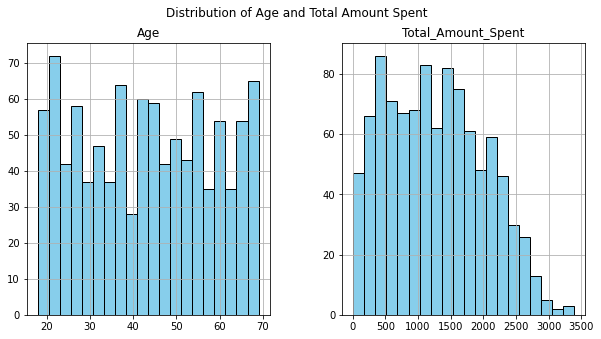

In [31]:
# Histograms for Age and Total_Amount_Spent
rawdata[['Age','Total_Amount_Spent']].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Age and Total Amount Spent')
plt.show()

Text(0, 0.5, 'Total Amount Spent')

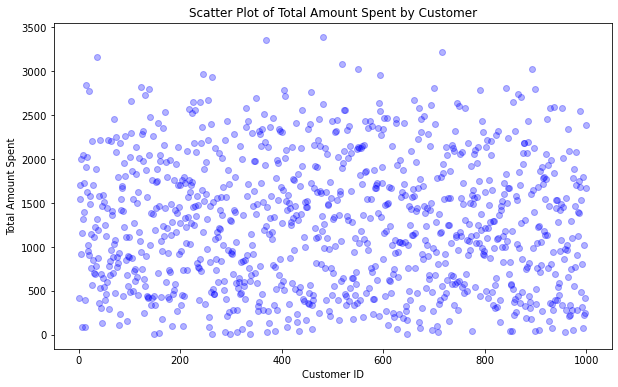

In [32]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rawdata['CustomerID'], rawdata['Total_Amount_Spent'], color='blue', alpha=0.3, label='Total Amount Spent')
plt.title('Scatter Plot of Total Amount Spent by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')

## Bivariate Analysis

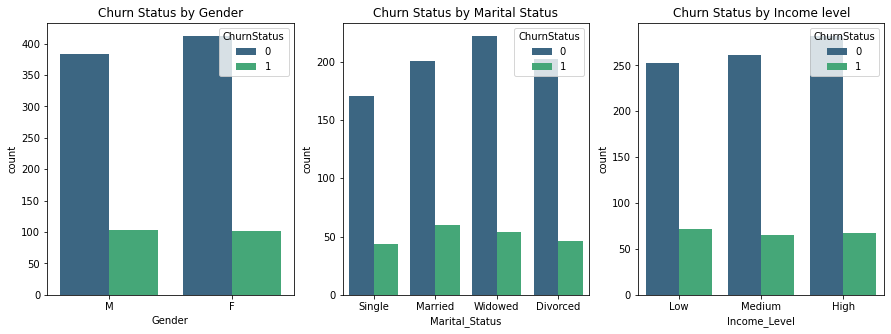

In [33]:
# Count plot of Gender and Marital_Status segmented by ChurnStatus
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=rawdata, x='Gender', hue='ChurnStatus', palette='viridis')
plt.title('Churn Status by Gender')

plt.subplot(1, 3, 2)
sns.countplot(data=rawdata, x='Marital_Status', hue='ChurnStatus', palette='viridis')
plt.title('Churn Status by Marital Status')

plt.subplot(1, 3, 3)
sns.countplot(data=rawdata, x='Income_Level', hue='ChurnStatus', palette='viridis')
plt.title('Churn Status by Income level')

plt.show()

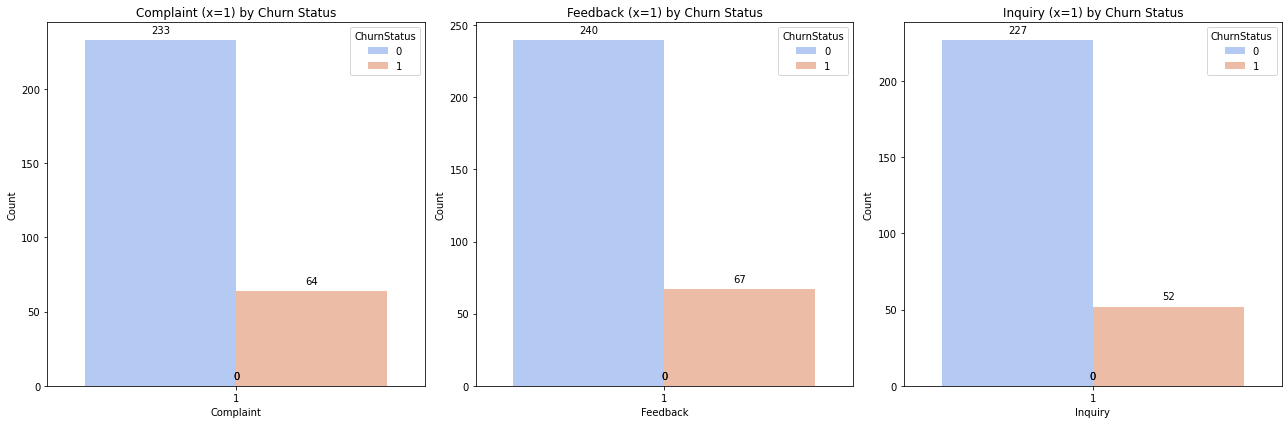

In [34]:
# Filter data for x=1
filtered_data_complaint = rawdata[rawdata['Complaint'] == 1]
filtered_data_feedback = rawdata[rawdata['Feedback'] == 1]
filtered_data_inquiry = rawdata[rawdata['Inquiry'] == 1]

# Set the size of the entire figure
plt.figure(figsize=(18, 6))

# Create a grid of subplots for filtered data
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=filtered_data_complaint, x='Complaint', hue='ChurnStatus', palette='coolwarm')

plt.title('Complaint (x=1) by Churn Status')
plt.xlabel('Complaint')
plt.ylabel('Count')

# Adding annotations for Complaint counts
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',  
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='bottom',  
                  fontsize=10, color='black',  
                  xytext=(0, 5),  
                  textcoords='offset points')


plt.subplot(1, 3, 2)
ax2= sns.countplot(data=filtered_data_feedback, x='Feedback', hue='ChurnStatus', palette='coolwarm')
plt.title('Feedback (x=1) by Churn Status')
plt.xlabel('Feedback')
plt.ylabel('Count')

# Adding annotations for Feedback counts
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',  
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='bottom',  
                  fontsize=10, color='black',  
                  xytext=(0, 5),  
                  textcoords='offset points')

plt.subplot(1, 3, 3)
ax3= sns.countplot(data=filtered_data_inquiry, x='Inquiry', hue='ChurnStatus', palette='coolwarm')
plt.title('Inquiry (x=1) by Churn Status')
plt.xlabel('Inquiry')
plt.ylabel('Count')

# Adding annotations for Inquiry counts
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}',  
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='bottom', 
                  fontsize=10, color='black',  
                  xytext=(0, 5),  
                  textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Correlation 

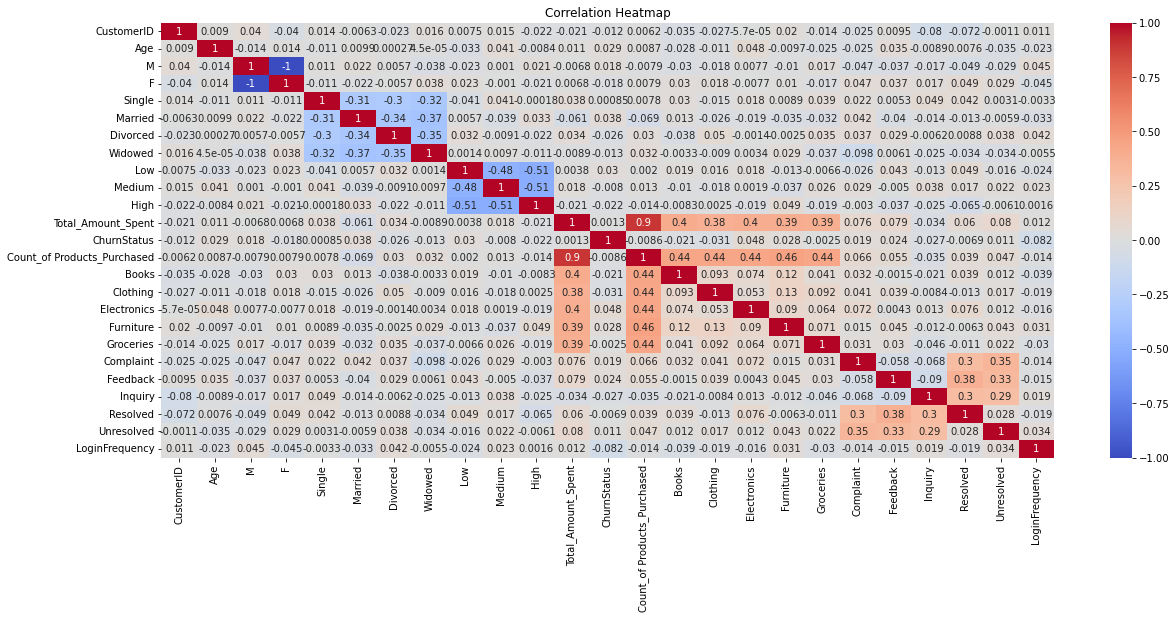

In [35]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(20, 8))
sns.heatmap(rawdata.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

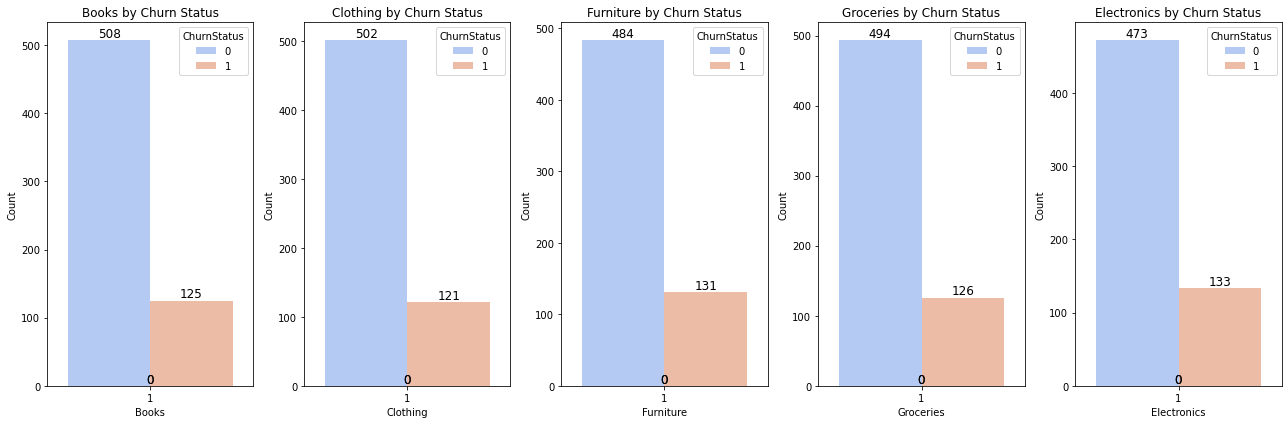

In [36]:
# Set the size of the entire figure
plt.figure(figsize=(18, 6))

# Define the columns for which to create count plots
columns = ['Books', 'Clothing', 'Furniture', 'Groceries', 'Electronics']

for i, column in enumerate(columns):
    plt.subplot(1, 5, i + 1)  
    # Filter data where the current category is equal to 1
    filtered_data = rawdata[rawdata[column] == 1]
    
    # Create count plot
    ax = sns.countplot(data=filtered_data, x=column, hue='ChurnStatus', palette='coolwarm')
    
    # Add count annotations on each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

    # Set title and labels
    plt.title(f'{column} by Churn Status')
    plt.xlabel(column)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Understanding Outliers

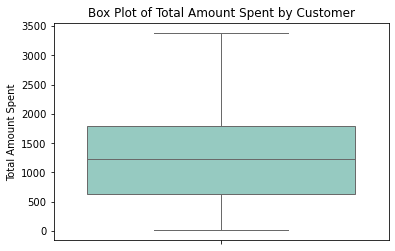

In [37]:
sns.boxplot(data=rawdata, y='Total_Amount_Spent', palette='Set3')
plt.title('Box Plot of Total Amount Spent by Customer')
plt.ylabel('Total Amount Spent')
plt.show()

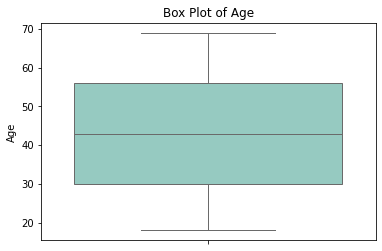

In [38]:
sns.boxplot(data=rawdata, y='Age', palette='Set3')
plt.title('Box Plot of Age')

plt.ylabel('Age')
plt.show()

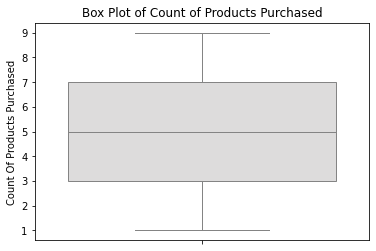

In [39]:
sns.boxplot(data=rawdata, y='Count_of Products_Purchased', palette='coolwarm')
plt.title('Box Plot of Count of Products Purchased')

plt.ylabel('Count Of Products Purchased')
plt.show()

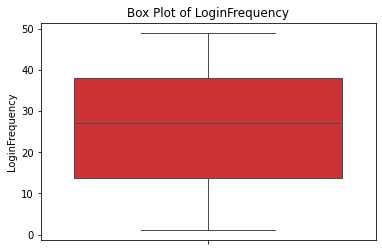

In [40]:
sns.boxplot(data=rawdata, y='LoginFrequency', palette='Set1')
plt.title('Box Plot of LoginFrequency')

plt.ylabel('LoginFrequency')
plt.show()

## Class Distribution of Response Variable

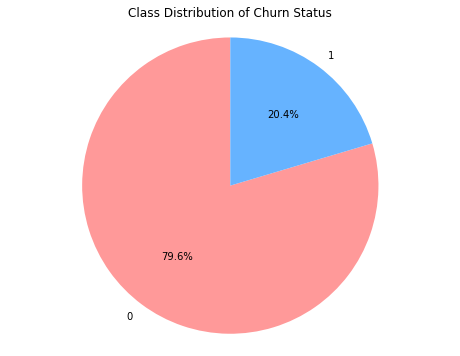

In [41]:
# Calculate class distribution
class_distribution = rawdata['ChurnStatus'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution of Churn Status')
plt.axis('equal')  
plt.show()

## Data Modelling

In [42]:
# Separating Data
data = rawdata.drop(columns=['Gender', 'Marital_Status', 'Income_Level'])
X = data.drop('ChurnStatus', axis=1)  # Features
y = data['ChurnStatus']                # Target variable



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [44]:
# Initialize ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Fit and resample the dataset
X_resampled2, y_resampled2 = adasyn.fit_resample(X_train, y_train)


In [45]:
# Scale the features
scaler = StandardScaler()
X_resampled2 = scaler.fit_transform(X_resampled2)
X_test = scaler.transform(X_test)

In [46]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.66
[[122  37]
 [ 31  10]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       159
           1       0.21      0.24      0.23        41

    accuracy                           0.66       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.68      0.66      0.67       200



In [47]:
# Create a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=200)

# Fit the model
random_forest_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the model

print("Random Forest Results:")
accuracy = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Results:
Accuracy: 0.80
[[159   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



## Understanding the Feature Importances

In [48]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_resampled2, y_resampled2)
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                        Feature  Importance
11           Total_Amount_Spent    0.104610
0                    CustomerID    0.094781
23               LoginFrequency    0.090070
1                           Age    0.083259
12  Count_of Products_Purchased    0.055609
10                         High    0.052310
2                             M    0.043330
3                             F    0.043219
6                      Divorced    0.042425
7                       Widowed    0.040357
9                        Medium    0.036341
8                           Low    0.033021
5                       Married    0.029716
14                     Clothing    0.029094
4                        Single    0.029085
17                    Groceries    0.025260
20                      Inquiry    0.023018
21                     Resolved    0.022841
13                        Books    0.022636
22                   Unresolved    0.022178
19                     Feedback    0.021533
15                  Electronics 

## Hyperparameter Tuning - Random Search

In [50]:
# Initialize Random Forest model in a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', RandomForestClassifier(class_weight='balanced',random_state=42))  
])

# Define hyperparameters to tune
# Set up parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  
    'classifier__max_depth': [None, 10, 20, 30],  
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4],    
    
}

# Set up Stratified K-Folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, 
                                   param_distributions=param_grid, 
                                   n_iter=100,  
                                   scoring='roc_auc',
                                   cv=skf, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

# Fit the model
random_search.fit(X_resampled2, y_resampled2)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best ROC_AUC Score:", random_search.best_score_)

# Use the best estimator
best_rf_random = random_search.best_estimator_

# Make predictions on the test set
y_pred_random = best_rf_random.predict(X_test)

# Calculate accuracy
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Test Set Accuracy with Random Search:", accuracy_random)


#ROC-AUC Score
y_pred_prob = best_rf_random.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC_Score with Random Search:", auc_score)

# Precision, Recall, F1 Score
report = classification_report(y_test, y_pred_random)
print("Classification Report:\n", report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20}
Best ROC_AUC Score: 0.9252108542421308
Test Set Accuracy with Random Search: 0.75
ROC_Score with Random Search: 0.5270747047093113
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       159
           1       0.15      0.05      0.07        41

    accuracy                           0.75       200
   macro avg       0.47      0.49      0.46       200
weighted avg       0.66      0.75      0.70       200

